In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Soal 1 - Sales Perusahaan

In [ ]:
sales_df = pd.read_csv("Company_data.csv")

In [ ]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Terlihat dari nilai rata-rata bahwa iklan di TV memakan biaya paling besar dibanding iklan di Radio ataupun di koran.

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Tipe data dalam dataset sudah sesuai.

### Linear Regression - TV

#### Split data train/test

In [ ]:
X = sales_df[['TV']]
y = sales_df[['Sales']]

In [ ]:
X.head(2)

,TV
0,230.1
1,44.5


In [ ]:
y.head(2)

,Sales
0,22.1
1,10.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.head()

,TV
71,109.8
124,229.5
184,253.8
97,184.9
149,44.7


In [ ]:
y_train.head()

,Sales
71,12.4
124,19.7
184,17.6
97,20.5
149,10.1


#### Build the model

In [ ]:
reg_tv = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', reg_tv.coef_[0])
print ('Intercept: ', reg_tv.intercept_)

Coefficients:  [0.05452888]
Intercept:  [7.12887806]


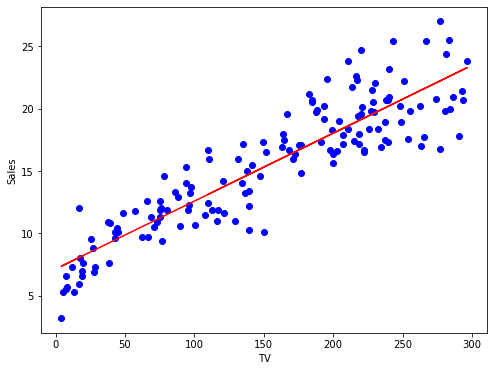

In [ ]:
reg_line = reg_tv.coef_[0][0]*X_train + reg_tv.intercept_[0]

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train['TV'], reg_line['TV'], '-r')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

#### Prediction

In [ ]:
predictions = reg_tv.predict(X_test)
predictions[:5]

array([[10.90227673],
       [ 9.85532218],
       [12.05828903],
       [22.92589531],
       [16.40969385]])

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['Pred'])
predict_df['Actual'] = y_test.values
predict_df.head()

,Pred,Actual
0,10.902277,11.3
1,9.855322,8.4
2,12.058289,12.0
3,22.925895,25.4
4,16.409694,16.7


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_df['Actual'], predict_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 2.4515


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     631.4
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           2.95e-55
Time:                        15:28:49   Log-Likelihood:                -332.98
No. Observations:                 150   AIC:                             670.0
Df Residuals:                     148   BIC:                             676.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1289      0.381     18.715      0.000       6.376       7.882
TV             0.0545      0.002     25.128      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.528   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.768   Jarque-Bera (JB):                0.640
Skew:                           0.130   Prob(JB):                        0.726
Kurtosis:                       2.813   Cond. No.                         365.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

RMSE dari model termasuk kecil yaitu di angka 2,45. Nilai R-squared juga lebih besar dari 0.75 dimana variabel independen (TV) mampu menjelaskan variasi dari variabel dependen (sales) dengan baik. 

### Linear Regression - Radio

#### Split data train/test

In [ ]:
X = sales_df[['Radio']]
y = sales_df[['Sales']]

In [ ]:
X.head(2)

,Radio
0,37.8
1,39.3


In [ ]:
y.head(2)

,Sales
0,22.1
1,10.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.head()

,Radio
71,14.3
124,32.3
184,21.3
97,21.0
149,25.8


In [ ]:
y_train.head()

,Sales
71,12.4
124,19.7
184,17.6
97,20.5
149,10.1


#### Build the model

In [ ]:
reg_radio = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', reg_radio.coef_[0])
print ('Intercept: ', reg_radio.intercept_)

Coefficients:  [0.12735575]
Intercept:  [12.56106382]


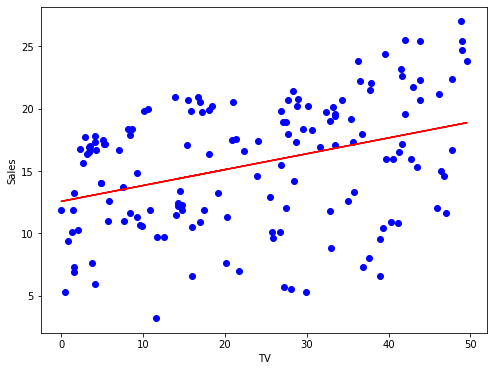

In [ ]:
reg_line = reg_radio.coef_[0][0]*X_train + reg_radio.intercept_[0]

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train['Radio'], reg_line['Radio'], '-r')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

#### Prediction

In [ ]:
predictions = reg_radio.predict(X_test)
predictions[:5]

array([[15.1718566 ],
       [14.03839047],
       [12.59927054],
       [17.94821186],
       [13.55443864]])

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['Pred'])
predict_df['Actual'] = y_test.values
predict_df.head()

,Pred,Actual
0,15.171857,11.3
1,14.038390,8.4
2,12.599271,12.0
3,17.948212,25.4
4,13.554439,16.7


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_df['Actual'], predict_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 5.5151


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           3.45e-06
Time:                        15:40:31   Log-Likelihood:                -446.63
No. Observations:                 150   AIC:                             897.3
Df Residuals:                     148   BIC:                             903.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5611      0.727     17.267      0.000      11.124      13.999
Radio          0.1274      0.026      4.825      0.000       0.075       0.180
==============================================================================
Omnibus:                       12.400   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.089
Skew:                          -0.486   Prob(JB):                       0.0106
Kurtosis:                       2.286   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Terlihat bahwa nilai R-squared dari model ini hanya bernilai 0,13. Hal ini mengindikasikan bahwa model tidak cukup baik dalam fitting data train. RMSE yang dihasilkan juga lebih besar daripada model dengan variabel TV yaitu 5,5.

### Linear Regression - Newspaper

#### Split data train/test

In [ ]:
X = sales_df[['Newspaper']]
y = sales_df[['Sales']]

In [ ]:
X.head(2)

,Newspaper
0,69.2
1,45.1


In [ ]:
y.head(2)

,Sales
0,22.1
1,10.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.head()

,Newspaper
71,31.7
124,74.2
184,30.0
97,22.0
149,20.6


In [ ]:
y_train.head()

,Sales
71,12.4
124,19.7
184,17.6
97,20.5
149,10.1


#### Build the model

In [ ]:
reg_news = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', reg_news.coef_[0])
print ('Intercept: ', reg_news.intercept_)

Coefficients:  [0.05490813]
Intercept:  [13.88976447]


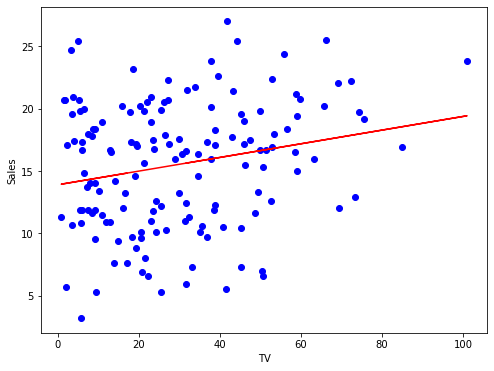

In [ ]:
reg_line = reg_news.coef_[0][0]*X_train + reg_news.intercept_[0]

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train['Newspaper'], reg_line['Newspaper'], '-r')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

#### Prediction

In [ ]:
predictions = reg_news.predict(X_test)
predictions[:5]

array([[14.89458316],
       [14.90007397],
       [15.16363297],
       [16.70106047],
       [15.82253047]])

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['Pred'])
predict_df['Actual'] = y_test.values
predict_df.head()

,Pred,Actual
0,14.894583,11.3
1,14.900074,8.4
2,15.163633,12.0
3,16.701060,25.4
4,15.822530,16.7


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_df['Actual'], predict_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 5.915


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     7.456
Date:                Sun, 06 Nov 2022   Prob (F-statistic):            0.00709
Time:                        15:43:15   Log-Likelihood:                -453.90
No. Observations:                 150   AIC:                             911.8
Df Residuals:                     148   BIC:                             917.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8898      0.725     19.161      0.000      12.457      15.322
Newspaper      0.0549      0.020      2.730      0.007       0.015       0.095
==============================================================================
Omnibus:                        5.235   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.142
Skew:                          -0.147   Prob(JB):                        0.208
Kurtosis:                       2.355   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Model ini memiliki kinerja paling buruk di antara tiga model yang diuji. Model ini memiliki RMSE 5,91 dan R-squared kurang dari 0,1. Ini bisa diartikan bahwa variabel Newspaper tidak mampu menjelaskan variasi pada label Sales sehingga model ini tidak mampu 'fit' dengan baik terhadap data train.

### Linear Regression - All

#### Split data train/test

In [ ]:
features = ['TV', 'Radio', 'Newspaper']
X = sales_df[features]
y = sales_df[['Sales']]

In [ ]:
X.head(2)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [ ]:
y.head(2)

,Sales
0,22.1
1,10.4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.head()

,TV,Radio,Newspaper
71,109.8,14.3,31.7
124,229.5,32.3,74.2
184,253.8,21.3,30.0
97,184.9,21.0,22.0
149,44.7,25.8,20.6


In [ ]:
y_train.head()

,Sales
71,12.4
124,19.7
184,17.6
97,20.5
149,10.1


#### Build the model

In [ ]:
reg_all = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', reg_all.coef_[0])
print ('Intercept: ', reg_all.intercept_)

Coefficients:  [ 5.34530806e-02  1.10417563e-01 -4.37125135e-05]
Intercept:  [4.72863089]


#### Prediction

In [ ]:
predictions = reg_all.predict(X_test)
predictions[:5]

array([[10.69034418],
       [ 8.68132435],
       [ 9.59290052],
       [24.88241319],
       [14.68606352]])

In [ ]:
predict_df = pd.DataFrame(predictions, columns=['Pred'])
predict_df['Actual'] = y_test.values
predict_df.head()

,Pred,Actual
0,10.690344,11.3
1,8.681324,8.4
2,9.592901,12.0
3,24.882413,25.4
4,14.686064,16.7


#### Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_df['Actual'], predict_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 1.9896


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     503.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           8.69e-77
Time:                        15:48:38   Log-Likelihood:                -275.36
No. Observations:                 150   AIC:                             558.7
Df Residuals:                     146   BIC:                             570.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7286      0.336     14.072      0.000       4.065       5.393
TV             0.0535      0.002     35.563      0.000       0.050       0.056
Radio          0.1104      0.009     12.423      0.000       0.093       0.128
Newspaper  -4.371e-05      0.007     -0.007      0.995      -0.013       0.013
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                1.006
Skew:                           0.182   Prob(JB):                        0.605
Kurtosis:                       2.833   Cond. No.                         479.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Terlihat bahwa Linear Regression menggunakan tiga atribut lebih efektif dibandingkan dengan regresi sederhana dengan 1 atribut. Hal ini dibuktikan oleh nilai RMSE yang lebih kecil yaitu sebesar 1,98 dan nilai R-squared dan Adjusted R-squared yang tinggi di angka 0,91.

## Soal 2 - Biaya Asuransi

In [ ]:
insurance_df = pd.read_csv("biaya_asuransi.csv")

In [ ]:
insurance_df.head()

,umur,jenis_kelamin,bmi,jumlah_anak,perokok,area_tempat_tinggal,biaya
0,19,wanita,27.900,0,iya,barat_daya,16884.92400
1,18,pria,33.770,1,tidak,tenggara,1725.55230
2,28,pria,33.000,3,tidak,tenggara,4449.46200
3,33,pria,22.705,0,tidak,barat_laut,21984.47061
4,32,pria,28.880,0,tidak,barat_laut,3866.85520


In [ ]:
insurance_df.describe()

,umur,bmi,jumlah_anak,biaya
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Rata-rata umur pemegang asuransi sekitar 40 tahun
- Pemegang asuransi umumnya sudah beranak 1
- Pemegang asuransi rata-rata memiliki BMI di atas > 25 yang berarti kelebihan berat badan

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   umur                 1338 non-null   int64  
 1   jenis_kelamin        1338 non-null   object 
 2   bmi                  1338 non-null   float64
 3   jumlah_anak          1338 non-null   int64  
 4   perokok              1338 non-null   object 
 5   area_tempat_tinggal  1338 non-null   object 
 6   biaya                1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Terlihat tidak ada null values. Tipe data setiap kolom juga sudah sesuai.

Sebelum dimasukkan ke dalam model linear regression, semua data bertipe string / object harus diubah dahulu ke bentuk numerik.

In [ ]:
insurance_df['perokok'].unique()

array(['iya', 'tidak'], dtype=object)

In [ ]:
dict_perokok = {'tidak': 0, 'iya': 1}
insurance_df['perokok'] = insurance_df['perokok'].apply(lambda x: dict_perokok[x])

In [ ]:
insurance_df['area_tempat_tinggal'].unique()

array(['barat_daya', 'tenggara', 'barat_laut', 'timur_laut'], dtype=object)

In [ ]:
dict_area = {'barat_daya': 0, 'tenggara': 1, 'barat_laut': 2, 'timur_laut': 3}
insurance_df['area_tempat_tinggal'] = insurance_df['area_tempat_tinggal'].apply(lambda x: dict_area[x])

In [ ]:
insurance_df['jenis_kelamin'].unique()

array(['wanita', 'pria'], dtype=object)

In [ ]:
dict_gender = {'wanita': 0, 'pria': 1}
insurance_df['jenis_kelamin'] = insurance_df['jenis_kelamin'].apply(lambda x: dict_gender[x])

In [ ]:
insurance_df.head()

,umur,jenis_kelamin,bmi,jumlah_anak,perokok,area_tempat_tinggal,biaya
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Linear Regression

#### Feature Engineering

In [ ]:
features = ['umur','jenis_kelamin','bmi','jumlah_anak','perokok','area_tempat_tinggal']
X = insurance_df[features]
y = insurance_df[['biaya']]

In [ ]:
X.head(2)

,umur,jenis_kelamin,bmi,jumlah_anak,perokok,area_tempat_tinggal
0,19,0,27.90,0,1,0
1,18,1,33.77,1,0,1


In [ ]:
y.head(2)

,biaya
0,16884.9240
1,1725.5523


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Modelling

In [ ]:
regr = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', regr.coef_[0])
print ('Intercept: ', regr.intercept_)

Coefficients:  [2.50537556e+02 3.65092141e+00 3.22881906e+02 4.50147445e+02
 2.36021161e+04 3.41244000e+02]
Intercept:  [-12284.8708249]


In [ ]:
predictions = regr.predict(X_test)
predictions[:5]

array([[10947.91401491],
       [ 9764.82733066],
       [38027.18625354],
       [16076.26656375],
       [ 7003.05093861]])

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['Pred'])
predictions_df['Actual'] = y_test.values
predictions_df.head()

,Pred,Actual
0,10947.914015,9724.53000
1,9764.827331,8547.69130
2,38027.186254,45702.02235
3,16076.266564,12950.07120
4,7003.050939,9644.25250


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predictions_df['Actual'], predictions_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 5663.3584


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biaya   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     457.4
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          4.46e-282
Time:                        16:10:01   Log-Likelihood:                -10177.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     996   BIC:                         2.040e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.228e+04   1166.394    -10.532      0.000   -1.46e+04   -9995.999
umur                  250.5376     14.062     17.817      0.000     222.943     278.132
jenis_kelamin           3.6509    392.214      0.009      0.993    -766.009     773.311
bmi                   322.8819     31.928     10.113      0.000     260.227     385.537
jumlah_anak           450.1474    162.504      2.770      0.006     131.258     769.037
perokok               2.36e+04    488.662     48.300      0.000    2.26e+04    2.46e+04
area_tempat_tinggal   341.2440    179.063      1.906      0.057     -10.141     692.629
==============================================================================
Omnibus:                      246.113   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.913
Skew:                           1.294   Prob(JB):                    2.68e-132
Kurtosis:                       5.793   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Dengan menggunakan seluruh atribut, model linear regression menghasilkan RMSE sebesar 5663.35. Nilai R-squared 0,73 berarti model cukup baik dalam 'fitting' data train. Mari kita lihat kinerja model bila atribut yang digunakan lebih sedikit.

### Linear Regression - Top 3 Features

#### Correlation Heatmap

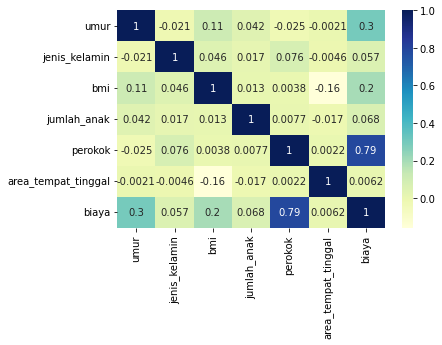

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(insurance_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Heatmap di atas menampilkan korelasi setiap atribut terhadap label biaya.

In [ ]:
insurance_df.corr()['biaya'].sort_values(ascending=False)

biaya                  1.000000
perokok                0.787251
umur                   0.299008
bmi                    0.198341
jumlah_anak            0.067998
jenis_kelamin          0.057292
area_tempat_tinggal    0.006208
Name: biaya, dtype: float64

Atribut / fitur dengan korelasi tertinggi adalah perokok, umur, dan bmi.

#### Feature Engineering

In [ ]:
features = ['perokok', 'umur', 'bmi']
X = insurance_df[features]
y = insurance_df[['biaya']]

In [ ]:
X.head(2)

,perokok,umur,bmi
0,1,19,27.90
1,0,18,33.77


In [ ]:
y.head(2)

,biaya
0,16884.9240
1,1725.5523


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Modelling

In [ ]:
regr = LinearRegression().fit(X_train, y_train)

print ('Coefficients: ', regr.coef_[0])
print ('Intercept: ', regr.intercept_)

Coefficients:  [23661.26266912   254.27296803   315.05007902]
Intercept:  [-11227.74578734]


In [ ]:
predictions = regr.predict(X_test)
predictions[:5]

array([[11508.96093643],
       [ 9976.10453072],
       [37418.6258025 ],
       [16374.52729505],
       [ 7426.82950831]])

In [ ]:
predictions_df = pd.DataFrame(predictions, columns=['Pred'])
predictions_df['Actual'] = y_test.values
predictions_df.head()

,Pred,Actual
0,11508.960936,9724.53000
1,9976.104531,8547.69130
2,37418.625802,45702.02235
3,16374.527295,12950.07120
4,7426.829508,9644.25250


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predictions_df['Actual'], predictions_df['Pred'], squared=False)
print(f"RMSE: {round(rmse, 4)}")

RMSE: 5716.4892


In [ ]:
import statsmodels.api as sm
x_train = sm.add_constant(X_train)
results = sm.OLS(y_train, x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  biaya   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     904.0
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          4.60e-284
Time:                        16:34:09   Log-Likelihood:                -10182.
No. Observations:                1003   AIC:                         2.037e+04
Df Residuals:                     999   BIC:                         2.039e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.123e+04   1090.228    -10.299      0.000   -1.34e+04   -9088.345
perokok     2.366e+04    489.110     48.376      0.000    2.27e+04    2.46e+04
umur         254.2730     14.071     18.071      0.000     226.661     281.885
bmi          315.0501     31.696      9.940      0.000     252.851     377.249
==============================================================================
Omnibus:                      246.890   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.890
Skew:                           1.303   Prob(JB):                    2.00e-131
Kurtosis:                       5.759   Cond. No.                         286.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

Model ini hanya menggunakan tiga atribut dengan korelasi tertinggi terhadap label biaya yaitu perokok, umur, dan bmi. Hasilnya tidak berbeda jauh dengan model yang menggunakan semua atribut dimana RMSEnya bernilai 5716,48 dan R-squared bernilai 0,73. <br><br>
Pada eksperimen ini dapat disimpulkan bahwa metode feature selection yaitu hanya menggunakan atribut dengan korelasi tertinggi tidak terlalu efektif untuk meningkatkan kinerja model. <br><br>
Alternatif solusinya adalah dengan mencoba metode regresi yang lain seperti XGBregressor, ANN, dan lain-lain. Reduksi dimensi dengan metode feature extraction seperti PCA juga bisa diaplikasikan.
